In [25]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
%matplotlib inline

In [3]:
data = pd.read_csv('../../data/clustering_data/gg_data.csv')

In [4]:
data = data.drop(['Unnamed: 0'],axis=1)

In [5]:
# 할인율_한시의 결측치를 할인율_상시로 대체
data['할인율_상시'] = data['할인율_상시'].fillna(0)
data['구매한도_월'] = data['구매한도_월'].fillna(0)
data['구매한도_연'] = data['구매한도_월'].fillna(0)
data['할인율_한시'] = np.where(pd.notnull(data['할인율_한시']) == True, data['할인율_한시'], data['할인율_상시'])

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31 entries, 0 to 30
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   시군           31 non-null     object 
 1   총인구수         31 non-null     float64
 2   할인율_상시       31 non-null     float64
 3   할인율_한시       31 non-null     float64
 4   구매한도_월       31 non-null     float64
 5   구매한도_연       31 non-null     float64
 6   지역화폐사용액(천원)  31 non-null     float64
 7   경제활동참가율      31 non-null     float64
 8   서비스업사업체비율    31 non-null     float64
 9   제조업사업체비율     31 non-null     float64
 10  도소매업사업체비율    31 non-null     float64
 11  운수업사업체비율     31 non-null     float64
 12  제조업종사자비율     31 non-null     float64
 13  도소매업종사자비율    31 non-null     float64
 14  운수업종사자비율     31 non-null     float64
 15  농업가구비율       31 non-null     float64
 16  합계출산율        31 non-null     float64
 17  도시지역면적       31 non-null     int64  
dtypes: float64(16), int64(1), object(1)
memory usage: 4.

In [7]:
# sns.pairplot(data, hue="시군", size=2)
# plt.show()

### 1) Normalization

In [8]:
x = data.drop(['시군'], axis=1)
y = data['시군'].values

In [9]:
# x객체에 x를 표준화한 데이터를 저장
trans_x = StandardScaler().fit_transform(x.values)

In [10]:
x_df = pd.DataFrame(trans_x, columns=x.columns)

### 2) PCA

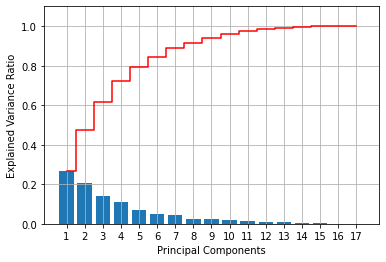

In [11]:
pca = PCA(n_components=x_df.shape[1])
pca.fit(x_df)
explained_variance_ratio = pca.explained_variance_ratio_

def explained_variance_ratio_plot(explained_variance_ratio):
    x_axis = range(1, len(explained_variance_ratio)+1)
    plt.bar(x_axis, explained_variance_ratio,
            align = 'center', label = 'Individual Explained Variance Ratio')
    plt.step(x_axis, np.cumsum(explained_variance_ratio),
             where = 'mid', color='red', label='Cumulative Explained Variance Ratio')
    plt.ylim(0, 1.1)
    plt.xticks(x_axis)
    plt.xlabel('Principal Components')
    plt.ylabel('Explained Variance Ratio')
    plt.grid()
    plt.show()

explained_variance_ratio_plot(explained_variance_ratio)

In [12]:
df_v = pd.DataFrame(np.cumsum(explained_variance_ratio[:10]), index=['PC1','PC2','PC3','PC4','PC5',
                                                                    'PC6','PC7','PC8','PC9','PC10'], columns=['Cum_V_ration'])

df_v

##주성분 7개 원래 데이터의 약 90% 설명

,Cum_V_ration
PC1,0.268292
PC2,0.474630
PC3,0.615495
PC4,0.723645
PC5,0.794486
PC6,0.843017
PC7,0.889943
PC8,0.915541
PC9,0.939211
PC10,0.957864


In [13]:
printcipalComponents = pca.fit_transform(x_df)

In [14]:
pca_data = pd.DataFrame(printcipalComponents[:,:7], columns = ['PC1','PC2','PC3','PC4','PC5','PC6','PC7'], index = y)

In [15]:
pca_data

,PC1,PC2,PC3,PC4,PC5,PC6,PC7
수원시,-1.619437,0.729999,-0.613208,2.023489,-0.538073,-0.210794,0.302403
성남시,-0.051796,4.935787,2.110950,2.283977,-0.415976,-1.699435,-0.463476
의정부시,-2.292301,0.690759,0.108035,-0.364486,-0.536567,0.326868,0.293463
안양시,-0.982912,1.010870,0.845584,0.240487,0.055557,-0.375253,-0.572105
부천시,0.047996,1.033013,-0.233562,1.028378,-0.272207,0.517339,-1.299623
광명시,-1.796285,0.539747,-0.538186,-1.279277,0.157101,-0.077066,-0.694161
평택시,0.821190,-0.255195,0.067825,0.209718,-0.845804,-0.710459,0.361335
동두천시,-1.300482,0.380035,1.052167,-1.536371,-1.278292,1.521124,0.255706
안산시,2.123972,2.676202,0.612033,-0.082061,-2.158880,0.077267,-1.423028
고양시,-2.110958,2.023540,-1.014500,1.411742,0.228208,0.026768,0.277778


### 3) K-Means Clustering

1. elbow method

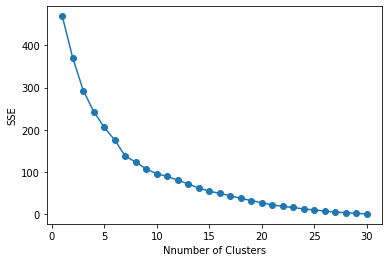

In [16]:
def elbow(x, n):
    sse = []
    for i in range(1, n):
        km = KMeans(n_clusters=i, init='k-means++', random_state=0)
        km.fit(x)
        sse.append(km.inertia_)
    plt.plot(range(1, n), sse, marker='o')
    plt.xlabel('Nnumber of Clusters')
    plt.ylabel('SSE')
    plt.show()
    
elbow(pca_data, 31)

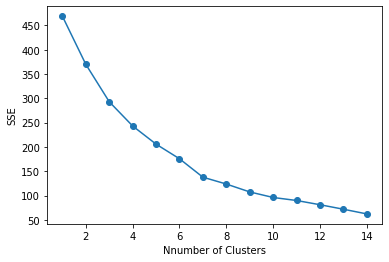

In [17]:
elbow(pca_data, 15)

In [18]:
kmeans = KMeans(n_clusters=7).fit(pca_data)

In [19]:
pca_data['cluster_id'] = kmeans.labels_

In [20]:
clust_data = pca_data

In [21]:
clust_data.sort_values(by='cluster_id')

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,cluster_id
군포시,0.228352,-1.088698,-1.637948,-1.279925,-0.860818,-0.563875,0.511793,0
광주시,1.558395,0.231943,-2.078554,-1.289442,0.746577,-0.381548,0.736583,0
이천시,0.537473,-1.378647,-0.924106,-1.499264,-1.140884,-1.540895,0.276077,0
의왕시,-0.851520,-0.043413,-1.680626,-2.481962,-1.518624,-0.144562,0.505163,0
평택시,0.821190,-0.255195,0.067825,0.209718,-0.845804,-0.710459,0.361335,0
오산시,-0.448952,0.123287,-0.248421,-1.610694,-1.404044,-1.282243,-0.317268,0
연천군,1.016945,-4.197127,2.402226,0.620292,1.161936,-1.136431,0.921703,1
여주시,0.034299,-1.876847,1.565902,-0.806009,0.599702,-0.273356,0.469602,1
가평군,-0.271752,-1.660088,3.991522,0.885565,-0.669786,0.366874,0.844097,1
양평군,-1.838545,-3.173439,2.081565,1.289742,-0.362756,-0.712077,-0.433226,1


In [22]:
data['cluster_id'] = kmeans.labels_

In [23]:
data.to_csv('../../data/clustering_data/cluster_data.csv', index=False)

2. silhouette

Range of SC Interpretation  
0.71-1.0 A strong structure has been found  
0.51-0.70 A reasonable structure has been found  
0.26-0.50 The structure is weak and could be artificial  
< 0.25 No substantial structure has been found  

In [28]:
kmeans_kwargs = { "init": "random", "n_init": 10, "max_iter": 300, "random_state": 0}

# A list holds the silhouette coefficients for each k
silhouette_coefficients = []


# Notice you start at 2 clusters for silhouette coefficient
for k in range(2, 30):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(pca_data)
    score = sklearn.metrics.silhouette_score(pca_data, kmeans.labels_)
    silhouette_coefficients.append(score)

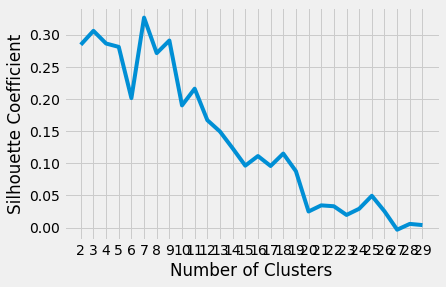

In [29]:
plt.style.use("fivethirtyeight")
plt.plot(range(2, 30), silhouette_coefficients)
plt.xticks(range(2, 30))
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Coefficient")
plt.show()

3. gap stastics  
https://anaconda.org/milesgranger/gap-statistic/notebook

In [30]:
def optimalK(data, nrefs=3, maxClusters=15):
    """
    Calculates KMeans optimal K using Gap Statistic from Tibshirani, Walther, Hastie
    Params:
        data: ndarry of shape (n_samples, n_features)
        nrefs: number of sample reference datasets to create
        maxClusters: Maximum number of clusters to test for
    Returns: (gaps, optimalK)
    """
    gaps = np.zeros((len(range(1, maxClusters)),))
    resultsdf = pd.DataFrame({'clusterCount':[], 'gap':[]})
    for gap_index, k in enumerate(range(1, maxClusters)):

        # Holder for reference dispersion results
        refDisps = np.zeros(nrefs)
            # For n references, generate random sample and perform kmeans getting resulting dispersion of each loop
        for i in range(nrefs):
            
            # Create new random reference set
            randomReference = np.random.random_sample(size=data.shape)
            
            # Fit to it
            km = KMeans(k)
            km.fit(randomReference)
            
            refDisp = km.inertia_
            refDisps[i] = refDisp

        # Fit cluster to original data and create dispersion
        km = KMeans(k)
        km.fit(data)
        
        origDisp = km.inertia_

        # Calculate gap statistic
        gap = np.log(np.mean(refDisps)) - np.log(origDisp)

        # Assign this loop's gap statistic to gaps
        gaps[gap_index] = gap
        
        resultsdf = resultsdf.append({'clusterCount':k, 'gap':gap}, ignore_index=True)

    return (gaps.argmax() + 1, resultsdf)  # Plus 1 because index of 0 means 1 cluster is optimal, index 2 = 3 clusters are optimal   
        

In [31]:
k, gapdf = optimalK(pca_data, nrefs=5, maxClusters=15)
print ('Optimal k is: ', k)

Optimal k is:  13


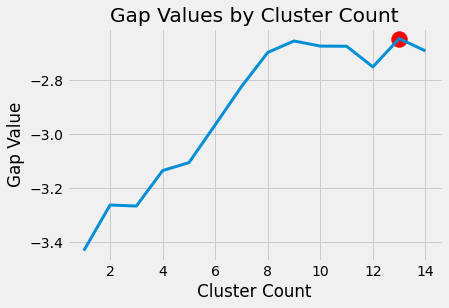

In [32]:
plt.plot(gapdf.clusterCount, gapdf.gap, linewidth=3)
plt.scatter(gapdf[gapdf.clusterCount == k].clusterCount, gapdf[gapdf.clusterCount == k].gap, s=250, c='r')
plt.grid(True)
plt.xlabel('Cluster Count')
plt.ylabel('Gap Value')
plt.title('Gap Values by Cluster Count')
plt.show()
